# Airbnb Data Analysis

`objective` : analyze Airbnb listings to uncover trends in pricing, availability, and customer preferences across neighborhoods.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Airbnb_Open_Data.csv")
df.shape

<ipython-input-4-637b16d4adad>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


(102599, 26)

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [ ]:
# null values
df.isnull().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [ ]:
# duplicates
df.duplicated().sum()

541

In [ ]:
df.drop_duplicates(inplace = True)

## Data Cleaning

In [ ]:
# in name column fill missing values with 'missing' word
df['NAME'] = df['NAME'].fillna('Missing')

In [ ]:
# filling with 'unconfirmed'
df['host_identity_verified'] = df['host_identity_verified'].fillna('unconfirmed')

In [ ]:
# filling with 'no mentioned'
df['host name'].fillna('no mentioned' , inplace = True)

<ipython-input-12-8ef3890b809e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host name'].fillna('no mentioned' , inplace = True)


In [ ]:
# droping this column's null values
df.dropna(subset = ['neighbourhood group', 'neighbourhood' ,'lat' ,'long' ,'instant_bookable', 'cancellation_policy', 'Construction year' , 'price' ,'service fee' ,'number of reviews' , 'minimum nights'] , inplace = True)

In [ ]:
# removing $ sign and comma
df['price'] = df['price'].str.replace("$", "").str.replace("," , "").astype(np.int16)

In [ ]:
# removing $ sign and comma
df['service fee'] = df['service fee'].str.replace("$", "").str.replace("," , "").astype(np.int16)

In [ ]:
# droping the 'country code column' because we have 'country column
df.drop(columns = 'country code' , inplace = True )

In [ ]:
# filling with 'United States' because all the dataset comes from there
df['country'].fillna('United States' , inplace = True)

<ipython-input-17-6b0072cbf773>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('United States' , inplace = True)


In [ ]:
# filling with mean value
df['calculated host listings count'].fillna(df['calculated host listings count'].mean() , inplace = True)

<ipython-input-18-156b062816b8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['calculated host listings count'].fillna(df['calculated host listings count'].mean() , inplace = True)


In [ ]:
# filling with median value
df['availability 365'].fillna(df['availability 365'].median() , inplace = True)

<ipython-input-19-6bdcc0cc0114>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['availability 365'].fillna(df['availability 365'].median() , inplace = True)


In [ ]:
# filling with 'not mentioned' word
df['house_rules'].fillna('not mentioned' , inplace = True)

<ipython-input-20-9680dcc4e6c6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['house_rules'].fillna('not mentioned' , inplace = True)


In [ ]:
# droping the 'license' column because most of the values are missing
df.drop(columns = 'license' , inplace = True)

In [ ]:
# filling the missing date with '01/01/1970' because it is  Unix Epoch — the starting point for time in Unix-based systems
df['last review'].fillna("01/01/1970" , inplace = True)

<ipython-input-22-c48cfc52b689>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last review'].fillna("01/01/1970" , inplace = True)


In [ ]:
# Convert 'last review' to datetime, with errors='coerce' to handle any invalid dates by setting them as NaT (Not a Time)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['last review'][df['last review'].dt.year >= 2024]

,last review
127,2024-08-15
255,2058-06-16
318,2026-03-28


here is some date are for 2024 , 2068 , 2026 we have to remove this

In [ ]:
df = df[df['last review'].dt.year < 2024]

In [ ]:
# filling with 0 because it is suitable
df['reviews per month'].fillna(0, inplace=True)

<ipython-input-25-d231c4c6180c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews per month'].fillna(0, inplace=True)
<ipython-input-25-d231c4c6180c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews per month'].fillna(0, inplace=True)


In [ ]:
# similary
df['review rate number'].fillna(0, inplace=True)

<ipython-input-26-7f7127202c70>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review rate number'].fillna(0, inplace=True)


# EDA

## Univariate Analysis

In [ ]:
df['id'].nunique()

100676

In [ ]:
df['NAME'].value_counts()

,count
NAME,
Missing,229
Home away from home,32
Hillside Hotel,30
New york Multi-unit building,27
Brooklyn Apartment,27
...,...
"Bright one bedroom. Lorimer (J,M) broadway (G)",1
New York Manhattan Club Metro Suite,1
FREE YOGA with Goodyoga's Guest Room!,1


Name can be same

In [ ]:
df['host id'].value_counts()

,count
host id,
29531702698,2
80014485718,1
11481607825,1
66956084347,1
55387752485,1
...,...
82291040442,1
39114532162,1
94857910224,1


In [ ]:
df[df['host id']==29531702698]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
23397,13923499,Magnificent Lakeview Home on Kissena Park in NYC,29531702698,verified,Ann,Queens,Flushing,40.74982,-73.80610,United States,...,1042,208,3.0,0.0,1970-01-01,0.00,2.0,6.0,256.0,not mentioned
42960,24728144,Missing,29531702698,verified,Seth,Brooklyn,Williamsburg,40.71867,-73.96163,United States,...,1142,228,2.0,1.0,2019-05-19,0.59,3.0,1.0,44.0,This is a non smoking apartment. No l


Same how this host id 29531702698 is present in 2 rows

In [ ]:
df['host_identity_verified'].value_counts()

,count
host_identity_verified,
unconfirmed,50522
verified,50154


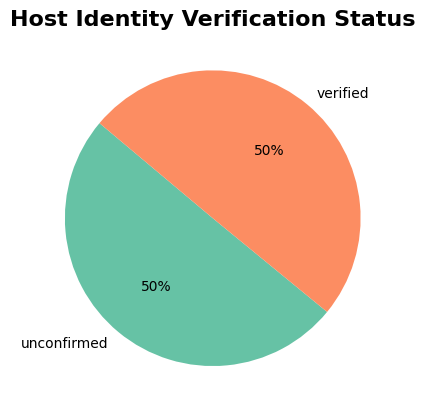

In [ ]:
df['host_identity_verified'].value_counts().plot(
    kind = 'pie' ,
    autopct = '%0.00f%%',
    startangle=140,
    colors = ['#66c2a5', '#fc8d62']
)

plt.title('Host Identity Verification Status', fontsize=16, weight='bold')
plt.ylabel('')  # Remove the default y-axis label
plt.show()

50% hosts are varified

In [ ]:
df['host name'].value_counts()

,count
host name,
Michael,864
David,753
John,568
Alex,537
Sonder (NYC),511
...,...
Delsy,1
Minnie,1
New Roc,1


In [ ]:
df['host name'].str.len().sort_values()

,host name
73948,1
75714,1
7365,1
41915,1
45492,1
...,...
57699,35
18575,35
13702,35
75739,35


In [ ]:
df['host name' ] = df['host name'].astype(str)

In [ ]:
df['host name'].apply(lambda x : x if len(x) == 1 else np.nan).dropna()

,host name
1165,D
1268,F
1345,T
1581,M
1768,D
...,...
101085,J
101149,T
101262,D
101355,J


Their is some record that have a single character host name

neighbourhood group
Manhattan        42970
Brooklyn         41072
Queens           13025
Bronx             2670
Staten Island      938
brookln              1
Name: count, dtype: int64


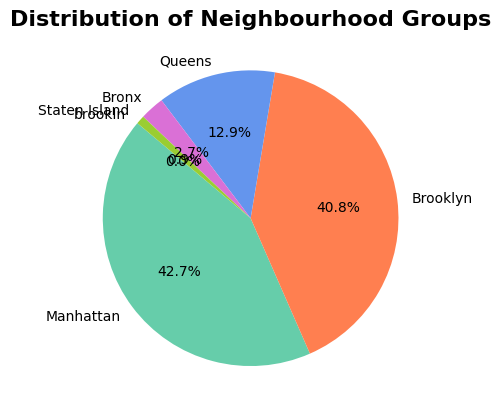

In [ ]:
print(df['neighbourhood group'].value_counts())

df['neighbourhood group'].value_counts().plot(
    kind = 'pie' ,
    autopct = '%0.01f%%',
    startangle = 140,
    colors = ['mediumaquamarine', 'coral', 'cornflowerblue', 'orchid', 'yellowgreen', 'gold', 'hotpink']
)

plt.title('Distribution of Neighbourhood Groups', fontsize=16 , weight = 'bold')
plt.ylabel('')
plt.show()

this 2 brookln , manhatan is spelling mistake so fix this   
`80%+ listing` from Manhattan and Brooklyn

In [ ]:
df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln' : 'Brooklyn' , 'manhatan' : 'Manhattan'})

In [ ]:
df['neighbourhood'].value_counts().head(20)

,count
neighbourhood,
Bedford-Stuyvesant,7790
Williamsburg,7620
Harlem,5364
Bushwick,4888
Hell's Kitchen,3915
Upper West Side,3795
Upper East Side,3600
East Village,3417
Midtown,3316


here is the top 20 neighbourhood : `'Bedford-Stuyvesant', 'Williamsburg', 'Harlem', 'Bushwick', 'Hell's Kitchen', 'Upper West Side', 'Upper East Side', 'East Village', 'Midtown', 'Crown Heights', 'East Harlem', 'Chelsea', 'Greenpoint', 'Lower East Side', 'Astoria', 'Washington Heights', 'Financial District', 'West Village', 'Flatbush', 'East Flatbush'`

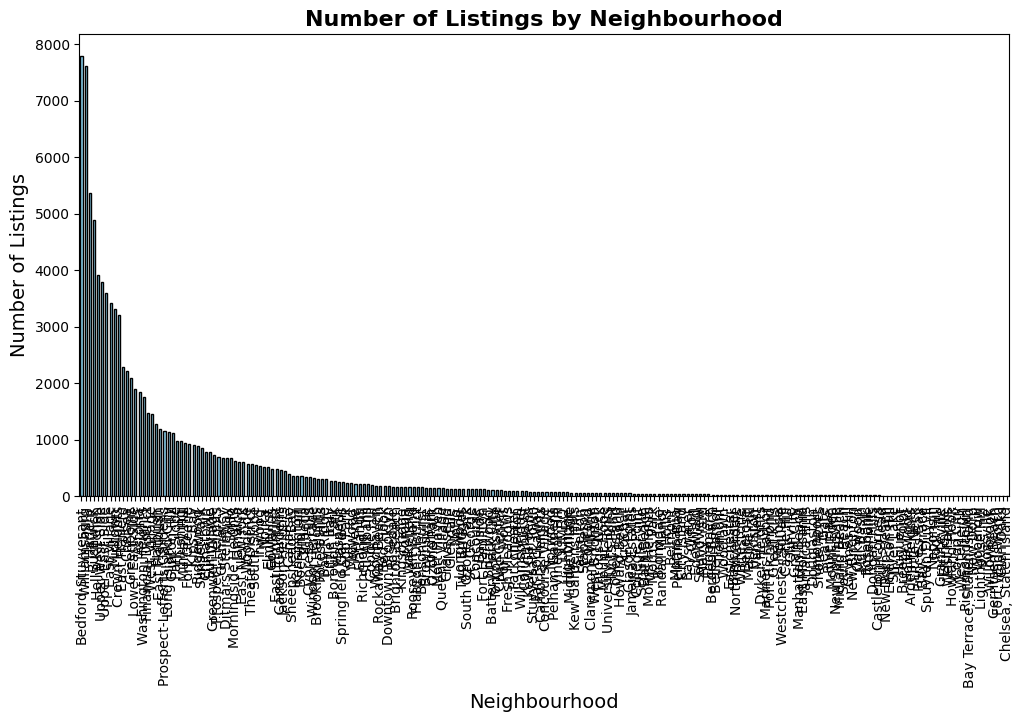

In [ ]:
plt.figure(figsize=(12, 6))
df['neighbourhood'].value_counts().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title('Number of Listings by Neighbourhood', fontsize=16, weight='bold')
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.show()

it looks like Pareto principal (80-20 rule)

In [ ]:
df['country'].value_counts()

,count
country,
United States,100676


all data from United States

In [ ]:
df['instant_bookable'].value_counts()

,count
instant_bookable,
False,50555
True,50121


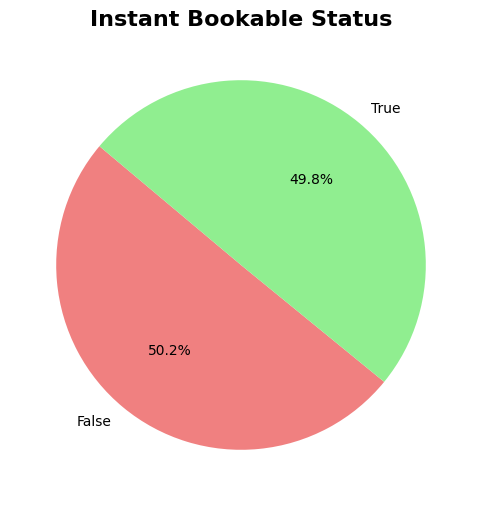

In [ ]:
plt.figure(figsize=(8, 6))
df['instant_bookable'].value_counts().plot(
    kind = 'pie' ,
    autopct = '%0.01f%%',
    colors = ['lightcoral', 'lightgreen'],
    startangle = 140
)

plt.title('Instant Bookable Status', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

almost equal , but instant bookable is false is slightly greater

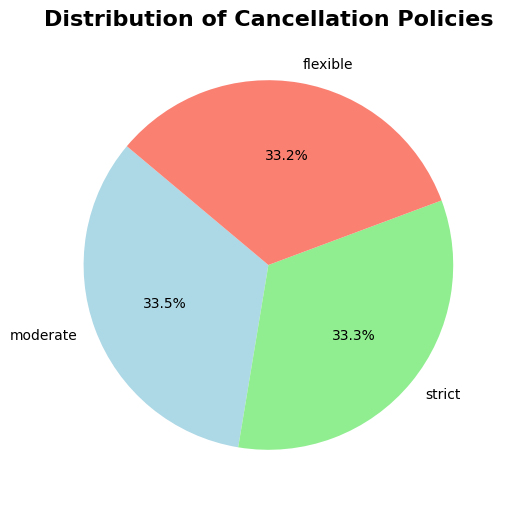

In [ ]:
plt.figure(figsize=(8, 6))
df['cancellation_policy'].value_counts().plot(
    kind = 'pie' ,
    autopct = '%0.01f%%',
    colors = ['lightblue', 'lightgreen', 'salmon', 'gold', 'plum'],
    startangle = 140
)

plt.title('Distribution of Cancellation Policies', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

almost equal but in moderate policy has little more

room type
Entire home/apt    52714
Private room       45660
Shared room         2191
Hotel room           111
Name: count, dtype: int64


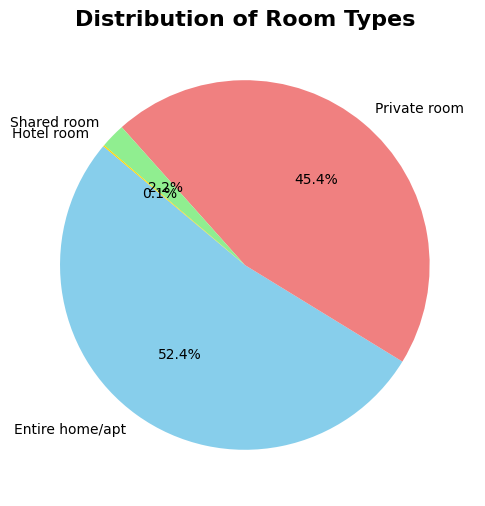

In [ ]:
plt.figure(figsize=(8, 6))

print(df['room type'].value_counts())

df['room type'].value_counts().plot(
    kind = 'pie' ,
    autopct = '%0.01f%%',
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold'],
    startangle = 140
)

plt.title('Distribution of Room Types', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

Entire home/apt and private room is contains `97%+`

In [ ]:
df['Construction year'].value_counts().sort_index()

,count
Construction year,
2003.0,5038
2004.0,4942
2005.0,5049
2006.0,5133
2007.0,5022
2008.0,5137
2009.0,5081
2010.0,5090
2011.0,4979


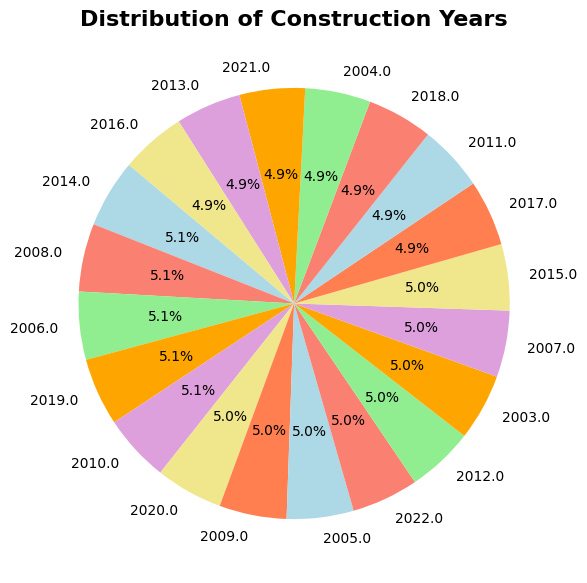

In [ ]:
plt.figure(figsize=(10, 7))
df['Construction year'].value_counts().plot(
    kind = 'pie' ,
    autopct = '%0.01f%%',
    colors = ['lightblue', 'salmon', 'lightgreen', 'orange', 'plum', 'khaki', 'coral'],
    startangle = 140
)

plt.title('Distribution of Construction Years', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

almost equal distributed

In [ ]:
df['price'].describe()

,price
count,100676.000000
mean,625.360513
std,331.689593
min,50.000000
25%,340.000000
50%,624.000000
75%,913.000000
max,1200.000000


prices ranges from 50 to 1200 dollers

In [ ]:
df['service fee'].describe()

,service fee
count,100676.000000
mean,125.072867
std,66.341324
min,10.000000
25%,68.000000
50%,125.000000
75%,183.000000
max,240.000000


service fee is ranges from 10 to 240 dollers

In [ ]:
df['minimum nights'].value_counts().head(10)

,count
minimum nights,
1.0,25076
2.0,23294
3.0,15889
30.0,11426
4.0,6533
5.0,5975
7.0,3966
6.0,1506
14.0,1056


majorities minimum nights is : **1, 2, 3, 4, 5, 6, 7, 10, 14, 30**

In [ ]:
# their is some negative values so taking absolute value
df['minimum nights'] = abs(df['minimum nights'])

In [ ]:
df['number of reviews'].value_counts().head(10).sum()

55317

In [ ]:
df['number of reviews'].value_counts().sum()

100676

55% of reviews comes from this no of reviews

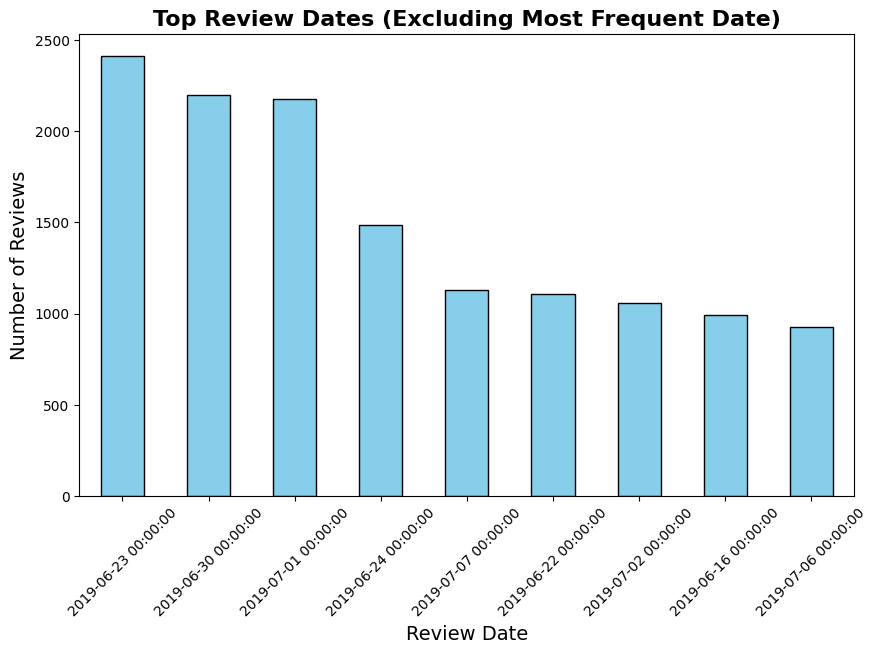

In [ ]:
plt.figure(figsize=(10, 6))
df['last review'].value_counts().iloc[1:10].plot(
    kind = 'bar',
    color = 'skyblue',
    edgecolor = 'black'
)

plt.title('Top Review Dates (Excluding Most Frequent Date)', fontsize=16, weight='bold')
plt.xlabel('Review Date', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

plt.xticks(rotation=45, fontsize=10)  # Rotate and adjust x-ticks
plt.yticks(fontsize=10)

plt.show()

all of this reviews comes in summer vacation

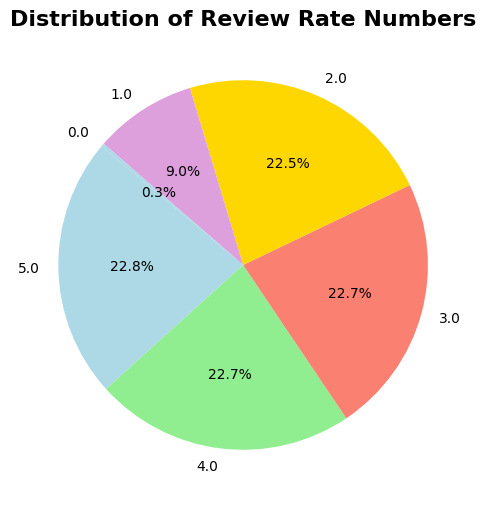

In [ ]:
plt.figure(figsize=(8, 6))
df['review rate number'].value_counts().plot(
    kind = 'pie' ,
    autopct='%0.01f%%',
    colors = ['lightblue', 'lightgreen', 'salmon', 'gold', 'plum'],
    startangle = 140
)

plt.title('Distribution of Review Rate Numbers', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

90% rating from 2 , 3, 4, 5  
here services can be more better for better user experience

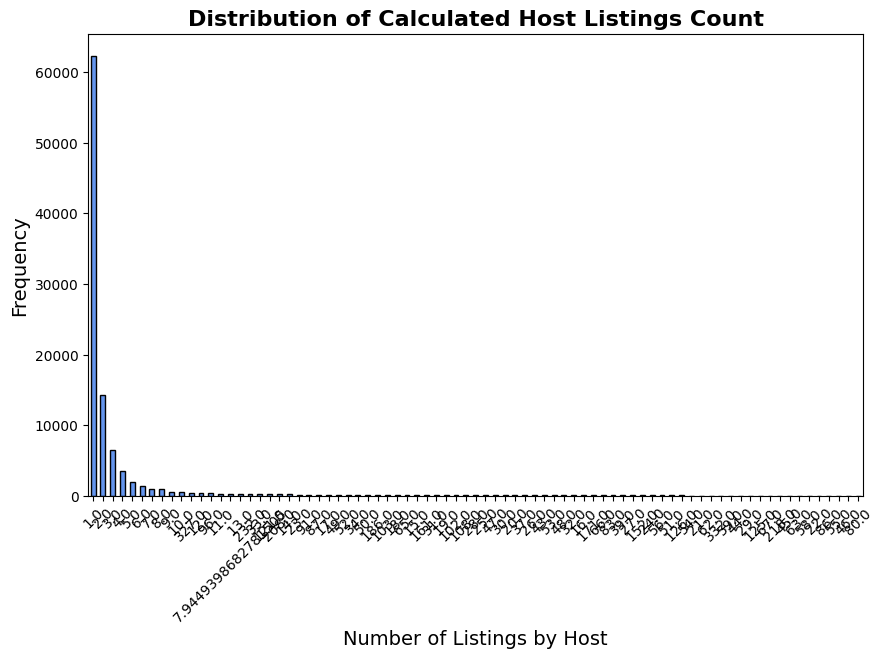

In [ ]:
plt.figure(figsize=(10, 6))
df['calculated host listings count'].value_counts().plot(
    kind = 'bar',
    color = 'cornflowerblue',
    edgecolor = 'black'
)

plt.title('Distribution of Calculated Host Listings Count', fontsize=16, weight='bold')
plt.xlabel('Number of Listings by Host', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

here also paroto principal

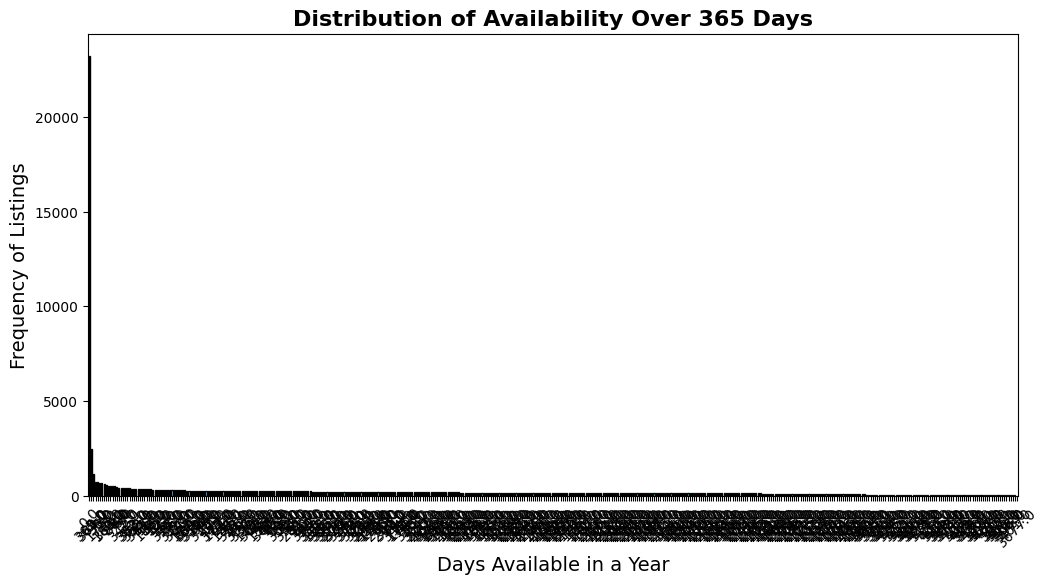

In [ ]:
plt.figure(figsize=(12, 6))
df['availability 365'].value_counts().plot(
      kind='bar',
      color='skyblue',
      edgecolor='black'
)

plt.title('Distribution of Availability Over 365 Days', fontsize=16, weight='bold')
plt.xlabel('Days Available in a Year', fontsize=14)
plt.ylabel('Frequency of Listings', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
print(df['house_rules'].head())

df['house_rules'][df['house_rules'] == 'not mentioned'].count()

0    Clean up and treat the home the way you'd like...
1    Pet friendly but please confirm with me if the...
2    I encourage you to use my kitchen, cooking and...
3                                        not mentioned
4    Please no smoking in the house, porch or on th...
Name: house_rules, dtype: object


51169

## Bi-Variate Analysis

In [ ]:
df.groupby('neighbourhood group')[['price']].describe()

price                                               \
                       count        mean         std   min     25%    50%   
neighbourhood group                                                         
Bronx                 2670.0  628.364794  323.720750  50.0  357.00  633.0   
Brooklyn             41073.0  626.296691  332.013856  50.0  341.00  626.0   
Manhattan            42970.0  622.840493  331.318083  50.0  338.00  621.5   
Queens               13025.0  630.209827  333.921843  50.0  340.00  628.0   
Staten Island          938.0  623.921109  325.407381  50.0  345.25  627.5   

                                     
                        75%     max  
neighbourhood group                  
Bronx                906.00  1200.0  
Brooklyn             913.00  1200.0  
Manhattan            912.00  1200.0  
Queens               921.00  1200.0  
Staten Island        909.25  1200.0

In [ ]:
df[df['neighbourhood group'] == 'Staten Island']['price'].describe()

,price
count,938.000000
mean,623.921109
std,325.407381
min,50.000000
25%,345.250000
50%,627.500000
75%,909.250000
max,1200.000000


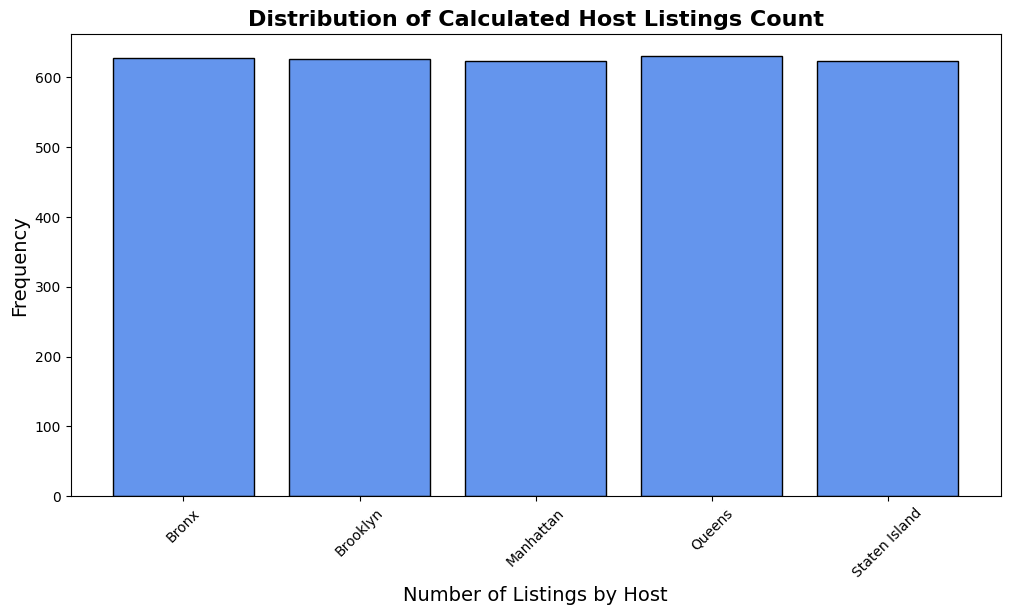

In [ ]:
neighbor_group_price = df.groupby('neighbourhood group')[['price']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(
    neighbor_group_price['neighbourhood group'] ,
    neighbor_group_price['price'],
    color = 'cornflowerblue',
    edgecolor = 'black'
)

plt.title('Distribution of Calculated Host Listings Count', fontsize=16, weight='bold')
plt.xlabel('Number of Listings by Host', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

similar prices for each neighbourhood groups

<Figure size 1400x800 with 0 Axes>

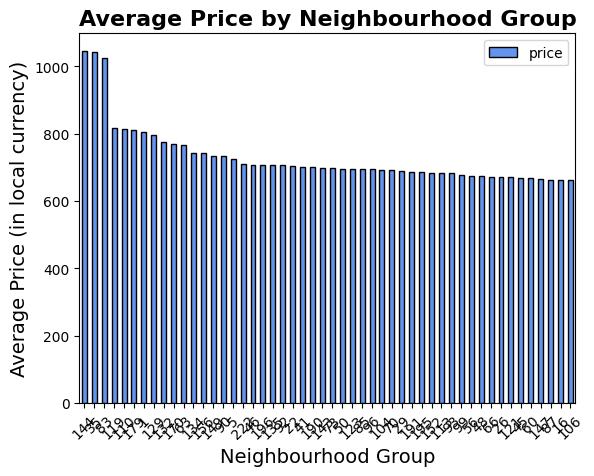

In [ ]:
plt.figure(figsize=(14, 8))
df.groupby('neighbourhood')[['price']].mean().reset_index().sort_values(by = 'price' , ascending = False).head(50).plot(
    kind = 'bar',
    color = 'cornflowerblue',
    edgecolor = 'black'
)

plt.title('Average Price by Neighbourhood Group', fontsize=16, weight='bold')
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Average Price (in local currency)', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.show()

In [ ]:
df.groupby('neighbourhood')[['price']].mean().reset_index().sort_values(by = 'price' , ascending = False).head(3)

,neighbourhood,price
144,New Dorp,1045.0
35,"Chelsea, Staten Island",1042.0
83,Fort Wadsworth,1024.0


In [ ]:
df.groupby('room type')[['price']].describe()

price                                                     \
                   count        mean         std   min    25%    50%    75%   
room type                                                                     
Entire home/apt  52714.0  625.033160  331.706330  50.0  339.0  624.0  914.0   
Hotel room         111.0  663.387387  314.065082  50.0  405.0  634.0  937.5   
Private room     45660.0  625.196737  331.379605  50.0  341.0  623.0  911.0   
Shared room       2191.0  634.722958  338.517816  50.0  325.0  655.0  927.0   

                         
                    max  
room type                
Entire home/apt  1200.0  
Hotel room       1193.0  
Private room     1200.0  
Shared room      1199.0

prices is little varying with room type

In [ ]:
df.groupby('Construction year')[['price']].describe()

price                                                      \
                    count        mean         std   min     25%    50%    75%   
Construction year                                                               
2003.0             5038.0  622.980548  332.907622  50.0  335.00  624.0  908.0   
2004.0             4942.0  629.725010  324.590368  50.0  355.50  635.0  905.0   
2005.0             5049.0  620.314122  333.696855  50.0  329.00  621.0  916.0   
2006.0             5133.0  635.677576  332.542254  50.0  353.00  640.0  924.0   
2007.0             5022.0  626.039626  333.303008  50.0  333.00  628.5  924.0   
2008.0             5137.0  639.167413  332.847776  50.0  357.00  637.0  928.0   
2009.0             5081.0  618.704389  331.134660  50.0  329.00  620.0  904.0   
2010.0             5090.0  626.326719  331.734375  50.0  343.00  625.0  916.0   
2011.0             4979.0  627.670416  331.234703  50.0  339.00  624.0  921.5   
2012.0             5045.0  623.700694  328.600414  50.0  343.00  623.0  907.0   
2013.0             4937.0  619.294106  329.540810  50.0  338.00  611.0  906.0   
2014.0             5156.0  631.699961  333.099364  50.0  351.00  631.0  920.0   
2015.0             5007.0  616.397444  335.310471  50.0  327.00  600.0  907.0   
2016.0             4931.0  624.604745  336.761585  50.0  330.00  625.0  915.0   
2017.0             4980.0  628.354618  324.598240  50.0  355.75  620.0  906.0   
2018.0             4965.0  624.744411  334.612301  50.0  326.00  622.0  913.0   
2019.0             5112.0  610.735915  327.559852  50.0  331.75  604.0  891.0   
2020.0             5084.0  621.697286  332.275879  50.0  337.00  613.0  912.0   
2021.0             4941.0  629.667476  335.766545  50.0  333.00  637.0  925.0   
2022.0             5047.0  629.422627  330.702633  50.0  346.50  639.0  917.0   

                           
                      max  
Construction year          
2003.0             1200.0  
2004.0             1199.0  
2005.0             1200.0  
2006.0             1199.0  
2007.0             1200.0  
2008.0             1200.0  
2009.0             1200.0  
2010.0             1200.0  
2011.0             1200.0  
2012.0             1200.0  
2013.0             1200.0  
2014.0             1200.0  
2015.0             1200.0  
2016.0             1200.0  
2017.0             1200.0  
2018.0             1200.0  
2019.0             1200.0  
2020.0             1200.0  
2021.0             1200.0  
2022.0             1200.0

Construction Year vs. Price is almost similar

In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')

In [ ]:
df.groupby('room type')[['minimum nights']].describe()

minimum nights                                           \
                         count      mean        std  min  25%  50%  75%   
room type                                                                 
Entire home/apt        52714.0  9.810259  29.479692  1.0  2.0  3.0  7.0   
Hotel room               111.0  4.198198   9.030071  1.0  1.0  1.0  1.0   
Private room           45660.0  6.303066  32.129727  1.0  1.0  2.0  4.0   
Shared room             2191.0  6.659060  24.439435  1.0  1.0  1.0  4.0   

                         
                    max  
room type                
Entire home/apt  3455.0  
Hotel room         30.0  
Private room     5645.0  
Shared room       999.0

In [ ]:
data = {
    'room type': ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
    'mean': [9.810259, 4.198198, 6.303066, 6.659060],
    'min': [1.0, 1.0, 1.0, 1.0],
    '25%': [2.0, 1.0, 1.0, 1.0],
    'median': [3.0, 1.0, 2.0, 1.0],
    '75%': [7.0, 1.0, 4.0, 4.0],
    'max': [3455.0, 30.0, 5645.0, 999.0]
}

min_nights_df  = pd.DataFrame(data)

min_nights_df

,room type,mean,min,25%,median,75%,max
0,Entire home/apt,9.810259,1.0,2.0,3.0,7.0,3455.0
1,Hotel room,4.198198,1.0,1.0,1.0,1.0,30.0
2,Private room,6.303066,1.0,1.0,2.0,4.0,5645.0
3,Shared room,6.659060,1.0,1.0,1.0,4.0,999.0


<ipython-input-69-ca2e748e3d19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


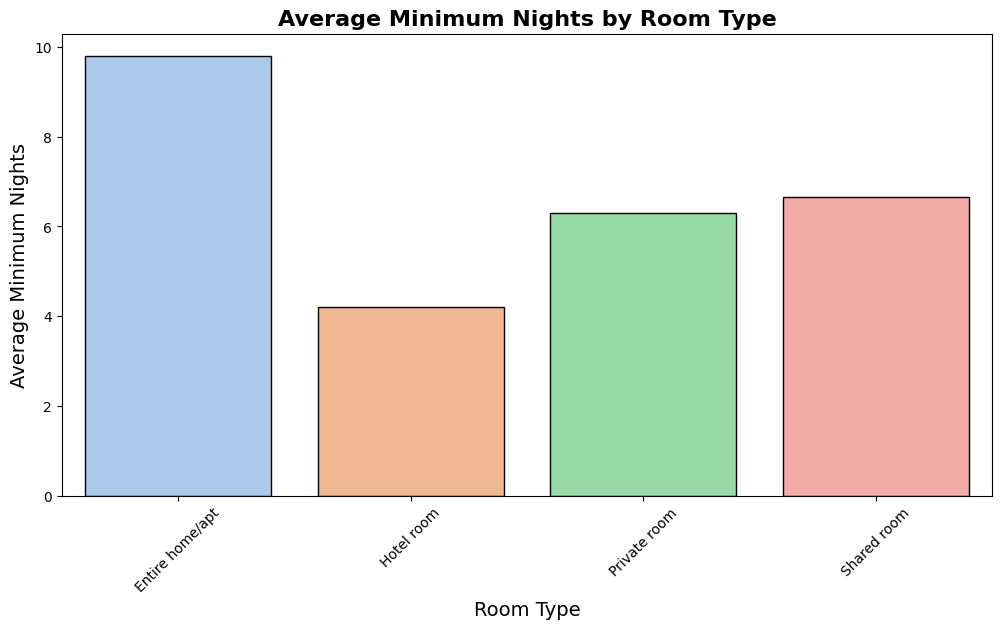

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='room type',
    y='mean',
    data=min_nights_df,
    palette='pastel',   # Using a pastel color palette for a softer look
    edgecolor = 'black'
)

plt.title('Average Minimum Nights by Room Type', fontsize=16, weight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Average Minimum Nights', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.show()

minimum no. of nights in Entire home/apt is higher then others for Mean stats

<ipython-input-70-c620b6d5d11e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


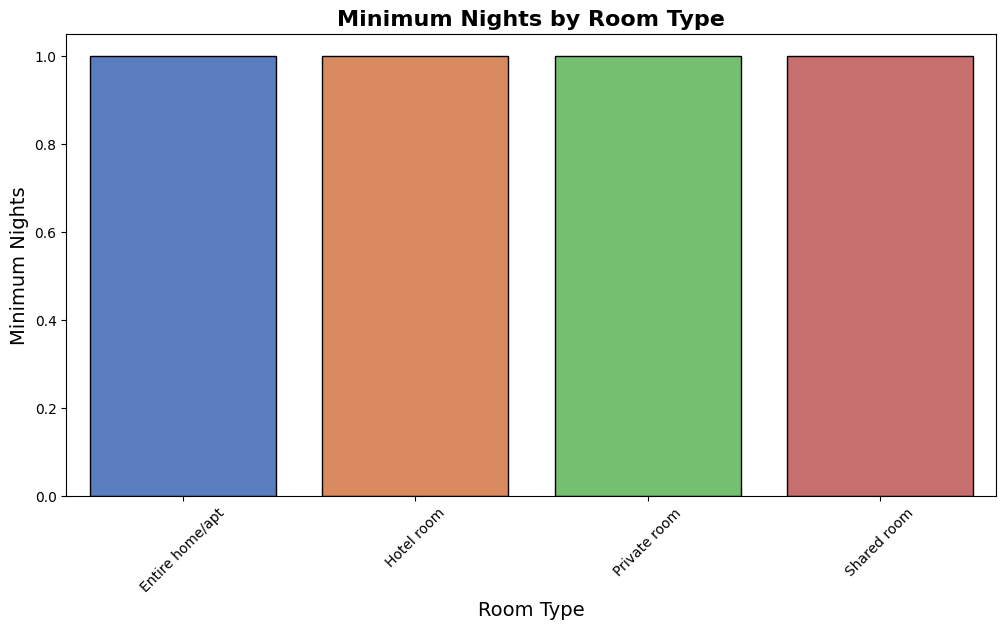

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    x='room type',
    y='min',
    data=min_nights_df,
    palette='muted',  # Use a muted color palette for a clean look
    edgecolor='black'
)

plt.title('Minimum Nights by Room Type', fontsize=16, weight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Minimum Nights', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.show()

minimum no. of nights in each type is same for minimum stats

<ipython-input-71-9c4ddcb2ca1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


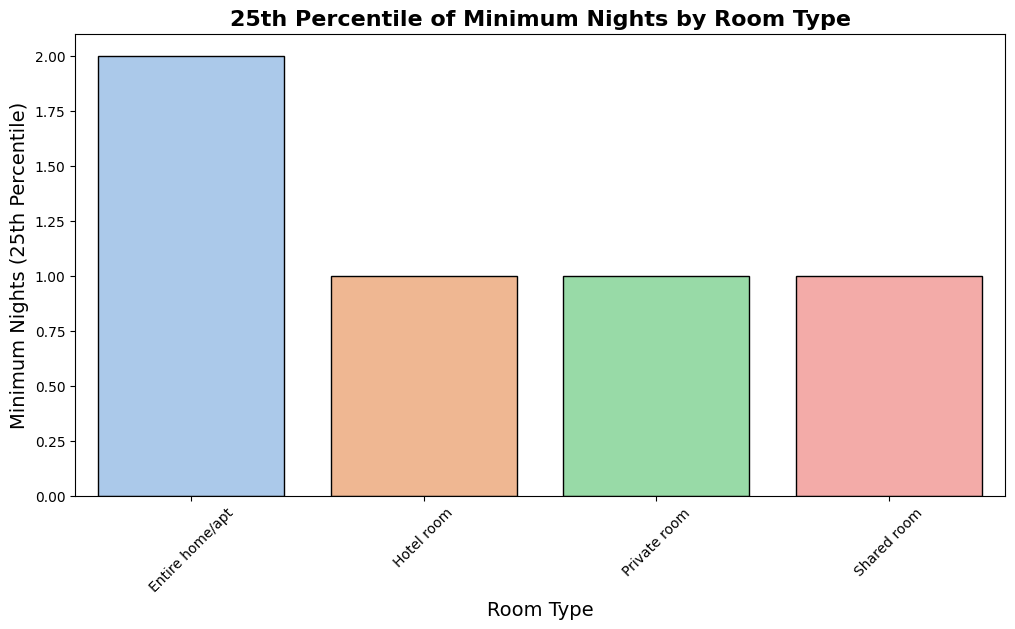

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    x='room type',
    y='25%',
    data=min_nights_df,
    palette='pastel',
    edgecolor='black'
)

plt.title('25th Percentile of Minimum Nights by Room Type', fontsize=16, weight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Minimum Nights (25th Percentile)', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.show()

minimum no. of nights in Entire home/apt is higher then others for 25% stats

<ipython-input-72-a34fa3172745>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


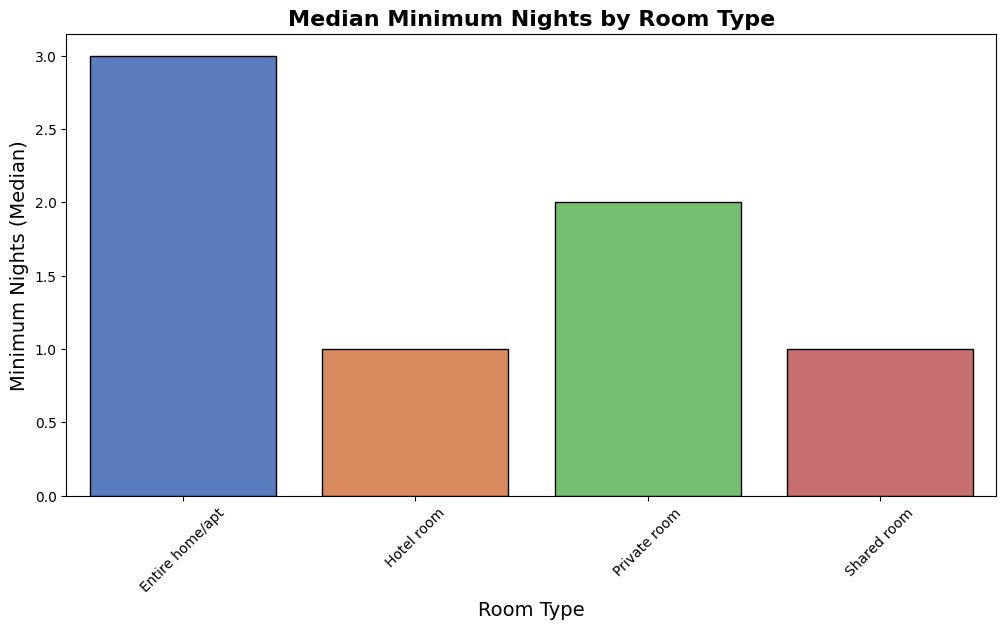

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    x='room type',
    y='median',
    data=min_nights_df,
    palette='muted',
    edgecolor='black'
)

plt.title('Median Minimum Nights by Room Type', fontsize=16, weight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Minimum Nights (Median)', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.show()

minimum no. of nights in Entire home/apt is higher then others for median stats

<ipython-input-73-56e36d9481d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


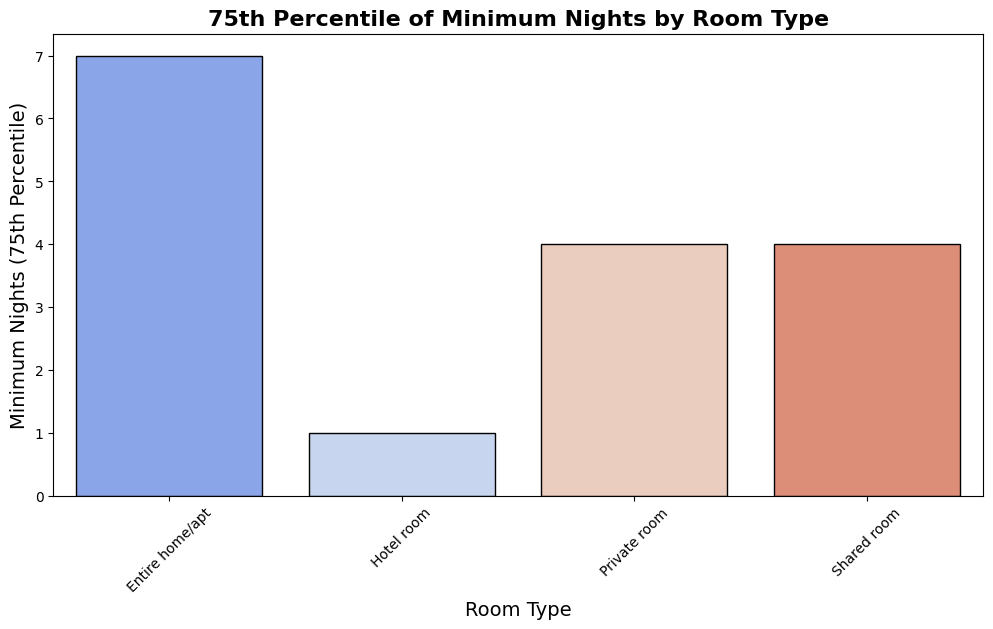

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    x='room type',
    y='75%',
    data=min_nights_df,
    palette='coolwarm',
    edgecolor='black'
)

plt.title('75th Percentile of Minimum Nights by Room Type', fontsize=16, weight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Minimum Nights (75th Percentile)', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.show()

minimum no. of nights in Entire home/apt is higher then others for 75% stats

<ipython-input-74-2a058c8cf279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


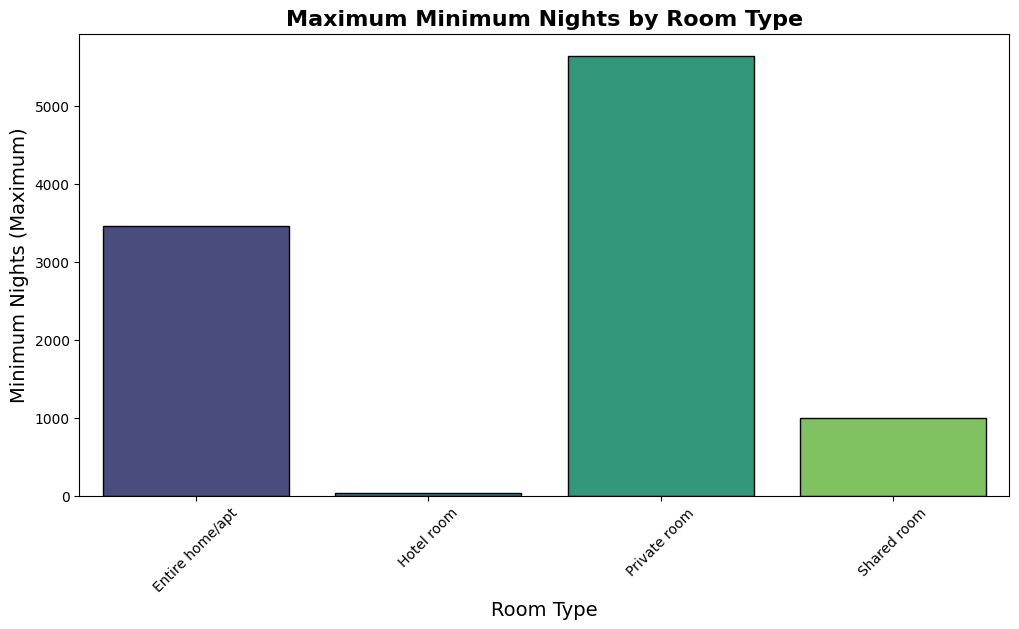

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    x='room type',
    y='max',
    data=min_nights_df,
    palette='viridis',
    edgecolor='black'
)

plt.title('Maximum Minimum Nights by Room Type', fontsize=16, weight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Minimum Nights (Maximum)', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.show()

minimum no. of nights in Private rooms are higher then others for max stats

**Conclusion:**  
This analysis of Airbnb listings in New York City revealed valuable insights into listing distribution, pricing, and user preferences. Most listings are concentrated in Manhattan and Brooklyn, aligning with high-demand areas, and follow the 80-20 rule where a few neighborhoods contribute to the bulk of listings. Property types are dominated by entire homes/apartments and private rooms, catering to users seeking flexible accommodation. The pricing data suggests relatively stable rates across neighborhoods but slight variations with room type, while minimum night requirements for entire homes tend to be higher than other property types. Seasonality plays a role, with a peak in reviews during summer, and most reviews suggest satisfaction but room for service improvement. Addressing identified data inconsistencies—such as unrealistic dates, duplicate IDs, and spelling errors—could improve data quality and reliability for deeper insights.

**Future Improvements:**

* Enhanced Data Quality Checks: Implement more rigorous data validation to catch issues like future dates, duplicate host IDs, and spelling errors in neighborhood names. This will improve data accuracy and provide a cleaner foundation for further analysis.

* Customer Sentiment Analysis: Conduct sentiment analysis on review text to capture qualitative aspects of guest experiences and identify specific service areas that can be improved for higher satisfaction ratings.

* Seasonal Pricing Strategy: Analyze price trends over different seasons to help hosts optimize their pricing strategies during peak and off-peak times. This can help maximize occupancy and revenue.

* Explore Additional Features: Including additional data points, such as proximity to landmarks or amenities, could provide deeper insights into factors influencing pricing and occupancy.

* Predictive Modeling: Develop models to predict occupancy rates and pricing based on neighborhood, property type, and seasonal trends. This can help Airbnb and hosts anticipate demand and adjust their offerings accordingly.